In [1]:
import pandas as pd


In [5]:
vista_hh = pd.read_csv("data\VISTA\H_VISTA_1220_SA1.csv")
vista_pp = pd.read_csv("data\VISTA\P_VISTA_1220_SA1.csv")

In [97]:
vista_pp["wdperswgt_sa3"].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
78973     True
78974    False
78975    False
78976    False
78977    False
Name: wdperswgt_sa3, Length: 78978, dtype: bool

In [98]:
vista_pp = vista_pp[~vista_pp["wdperswgt_sa3"].isna()]
vista_pp

,persid,hhid,persno,numstops,monthofbirth,yearofbirth,age,sex,relationship,persinc,...,additionaltravel,cycledwork,cycledshopping,cycledexercise,cycledother,nocycled,wdperswgt_sa3,weperswgt_sa3,wdperswgt_lga,weperswgt_lga
0,Y12H0000101P01,Y12H0000101,1,2,April,1962,50,M,Self,$1000-1249 p.w.,...,N,N,N,N,N,Y,79.54,NaN,74.87,NaN
1,Y12H0000101P02,Y12H0000101,2,5,January,1969,43,F,Spouse,$1-199 p.w.,...,N,N,N,N,N,Y,87.92,NaN,82.68,NaN
2,Y12H0000101P03,Y12H0000101,3,2,July,2000,11,F,Child,Zero Income,...,N,N,N,N,N,Y,96.71,NaN,91.01,NaN
3,Y12H0000101P04,Y12H0000101,4,2,August,2005,6,F,Child,Zero Income,...,N,N,N,N,N,Y,95.17,NaN,89.83,NaN
4,Y12H0000102P01,Y12H0000102,1,0,January,1955,57,F,Spouse,$1-199 p.w.,...,NaN,N,N,N,N,Y,75.07,NaN,70.72,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78971,Y20H4001024P02,Y20H4001024,2,0,December,1963,56,M,Spouse,Zero Income,...,N,N,N,N,N,Y,279.28,NaN,272.59,NaN
78974,Y20H4001029P01,Y20H4001029,1,0,June,1946,73,M,Self,$300-399 p.w.,...,N,N,N,N,N,Y,346.67,NaN,339.21,NaN
78975,Y20H4001029P02,Y20H4001029,2,2,June,1949,70,F,Spouse,$300-399 p.w.,...,N,N,N,N,N,Y,334.55,NaN,327.28,NaN
78976,Y20H4001036P01,Y20H4001036,1,0,June,1944,75,F,Self,$400-599 p.w.,...,N,N,N,N,N,Y,334.55,NaN,327.28,NaN


<Axes: title={'center': 'VISTA ANZSCO1 weights by SA3'}, xlabel='anzsco1'>

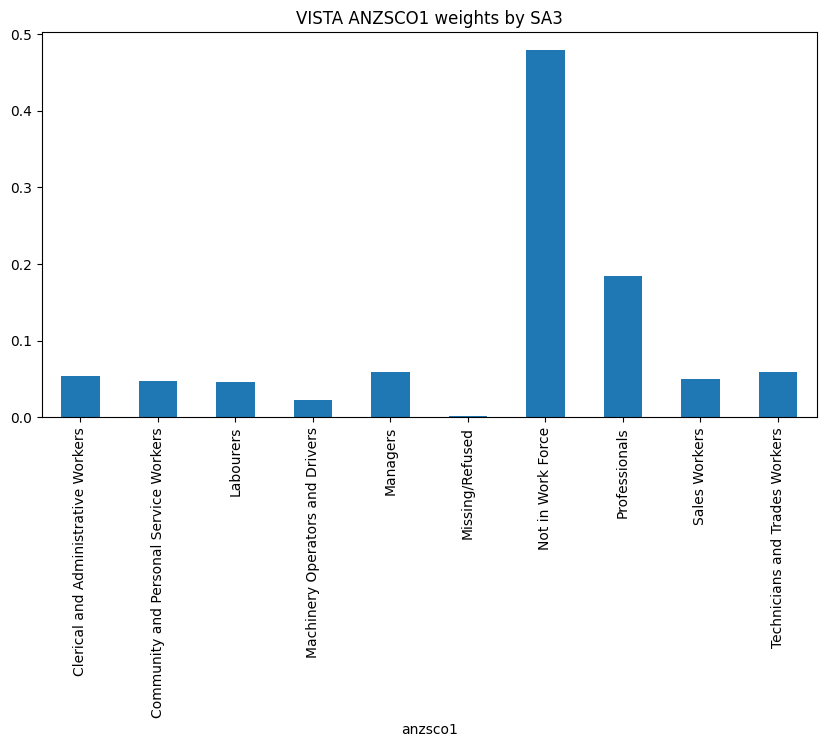

In [102]:
(vista_pp.groupby("anzsco1")["wdperswgt_sa3"].sum() / vista_pp["wdperswgt_sa3"].sum()).plot(kind="bar", figsize=(10, 5), title="VISTA ANZSCO1 weights by SA3")

In [155]:
sub_pp_atts = vista_pp[["hhid", "sex", "relationship", "anzsco1", "anzsco2", "anzsic1", "anzsic2", "wdperswgt_sa3"]]
sub_pp_atts

,hhid,sex,relationship,anzsco1,anzsco2,anzsic1,anzsic2,wdperswgt_sa3
0,Y12H0000101,M,Self,Community and Personal Service Workers,Hospitality Workers,Administrative and Support Services,Administrative Services,79.54
1,Y12H0000101,F,Spouse,Not in Work Force,Not in Work Force,Not in Work Force,Not In Work Force,87.92
2,Y12H0000101,F,Child,Not in Work Force,Not in Work Force,Not in Work Force,Not In Work Force,96.71
3,Y12H0000101,F,Child,Not in Work Force,Not in Work Force,Not in Work Force,Not In Work Force,95.17
4,Y12H0000102,F,Spouse,Not in Work Force,Not in Work Force,Not in Work Force,Not In Work Force,75.07
...,...,...,...,...,...,...,...,...
78971,Y20H4001024,M,Spouse,Not in Work Force,Not in Work Force,Not in Work Force,Not In Work Force,279.28
78974,Y20H4001029,M,Self,Not in Work Force,Not in Work Force,Not in Work Force,Not In Work Force,346.67
78975,Y20H4001029,F,Spouse,Not in Work Force,Not in Work Force,Not in Work Force,Not In Work Force,334.55
78976,Y20H4001036,F,Self,Not in Work Force,Not in Work Force,Not in Work Force,Not In Work Force,334.55


In [156]:
# filter to find only household with self and spouse
only_self_spouse = sub_pp_atts[(sub_pp_atts["relationship"] == "Self") | (sub_pp_atts["relationship"] == "Spouse")]
# only hh with more than 1
hhid_have_more = only_self_spouse["hhid"].value_counts() == 2
hhid_have_more = hhid_have_more[hhid_have_more]
have_spouse = only_self_spouse[only_self_spouse["hhid"].isin(hhid_have_more.index)]
have_spouse

,hhid,sex,relationship,anzsco1,anzsco2,anzsic1,anzsic2,wdperswgt_sa3
0,Y12H0000101,M,Self,Community and Personal Service Workers,Hospitality Workers,Administrative and Support Services,Administrative Services,79.54
1,Y12H0000101,F,Spouse,Not in Work Force,Not in Work Force,Not in Work Force,Not In Work Force,87.92
4,Y12H0000102,F,Spouse,Not in Work Force,Not in Work Force,Not in Work Force,Not In Work Force,75.07
5,Y12H0000102,M,Spouse,Not in Work Force,Not in Work Force,Not in Work Force,Not In Work Force,77.79
8,Y12H0000103,M,Self,Technicians and Trades Workers,TECHNICIANS AND TRADES WORKERS (NEC),Construction,Building Construction,90.41
...,...,...,...,...,...,...,...,...
78969,Y20H4001017,M,Spouse,Not in Work Force,Not in Work Force,Not in Work Force,Not In Work Force,344.04
78970,Y20H4001024,F,Self,Not in Work Force,Not in Work Force,Not in Work Force,Not In Work Force,269.51
78971,Y20H4001024,M,Spouse,Not in Work Force,Not in Work Force,Not in Work Force,Not In Work Force,279.28
78974,Y20H4001029,M,Self,Not in Work Force,Not in Work Force,Not in Work Force,Not In Work Force,346.67


In [157]:
sex_gb = have_spouse.groupby("hhid")["sex"].apply(lambda x: list(x))
rela_gb = have_spouse.groupby("hhid")["relationship"].apply(lambda x: list(x))

In [173]:
# filter to have household that have both [M, M]
gay_hh_id = sex_gb[sex_gb.apply(lambda x: (x[0] == "M" and x[1] == "M"))].index
hetero_hh_id = sex_gb[sex_gb.apply(lambda x: (x[0] == "M" and x[1] == "F") or (x[0] == "F" and x[1] == "M"))].index

In [162]:
b = have_spouse[have_spouse["hhid"].isin(gay_hh_id)]
b = b[b["anzsco1"]!="Not in Work Force"]
b

,hhid,sex,relationship,anzsco1,anzsco2,anzsic1,anzsic2,wdperswgt_sa3
1010,Y12H0050103,M,Self,Professionals,Education Professionals,Education and Training,Tertiary Education,86.29
1592,Y12H0070525,M,Self,Sales Workers,Sales Representatives and Agents,Retail Trade,Motor Vehicle and Motor Vehicle Parts Retailing,73.68
1593,Y12H0070525,M,Spouse,Clerical and Administrative Workers,Numerical Clerks,Retail Trade,Motor Vehicle and Motor Vehicle Parts Retailing,73.68
1596,Y12H0070531,M,Self,Professionals,Arts and Media Professionals,Health Care and Social Assistance,Health Care and Social Assistance (NEC),73.56
1597,Y12H0070531,M,Spouse,Technicians and Trades Workers,"Engineering, ICT and Science Technicians",Other Services,Other Services (NEC),84.26
...,...,...,...,...,...,...,...,...
78145,Y20H3940329,M,Self,Professionals,"Business, Human Resource and Marketing Profess...","Professional, Scientific and Technical Services","Professional, Scientific and Technical Service...",86.97
78146,Y20H3940329,M,Spouse,Professionals,PROFESSIONAL (NEC),"Professional, Scientific and Technical Services","Professional, Scientific and Technical Service...",86.97
78627,Y20H3980131,M,Spouse,Labourers,Cleaners and Laundry Workers,Administrative and Support Services,"Building Cleaning, Pest Control and Other Supp...",157.89
78932,Y20H4000422,M,Self,Professionals,"Business, Human Resource and Marketing Profess...",Health Care and Social Assistance,Medical and Other Health Care Services,78.47


In [163]:
c = have_spouse[have_spouse["hhid"].isin(hetero_hh_id)]
c = c[c["anzsco1"]!="Not in Work Force"]
c

,hhid,sex,relationship,anzsco1,anzsco2,anzsic1,anzsic2,wdperswgt_sa3
0,Y12H0000101,M,Self,Community and Personal Service Workers,Hospitality Workers,Administrative and Support Services,Administrative Services,79.54
8,Y12H0000103,M,Self,Technicians and Trades Workers,TECHNICIANS AND TRADES WORKERS (NEC),Construction,Building Construction,90.41
9,Y12H0000103,F,Spouse,Clerical and Administrative Workers,Inquiry Clerks and Receptionists,Health Care and Social Assistance,Medical and Other Health Care Services,87.25
12,Y12H0000104,F,Self,Professionals,PROFESSIONAL (NEC),Financial and Insurance Services,Finance,76.29
13,Y12H0000104,M,Spouse,Professionals,PROFESSIONAL (NEC),"Agriculture, Forestry and Fishing","Agriculture, Forestry and Fishing (NEC)",79.06
...,...,...,...,...,...,...,...,...
78958,Y20H4000437,F,Spouse,Professionals,Education Professionals,Education and Training,Education and Training (NEC),59.13
78962,Y20H4001008,M,Self,Community and Personal Service Workers,Sports and Personal Service Workers,Manufacturing,Printing (including the Reproduction of Record...,276.77
78963,Y20H4001008,F,Spouse,Sales Workers,Sales Assistants and Salespersons,Retail Trade,Retail Trade (NEC),271.58
78964,Y20H4001009,F,Self,Labourers,Food Preparation Assistants,Accommodation and Food Services,Food and Beverage Services,265.63


<Axes: ylabel='wdperswgt_sa3'>

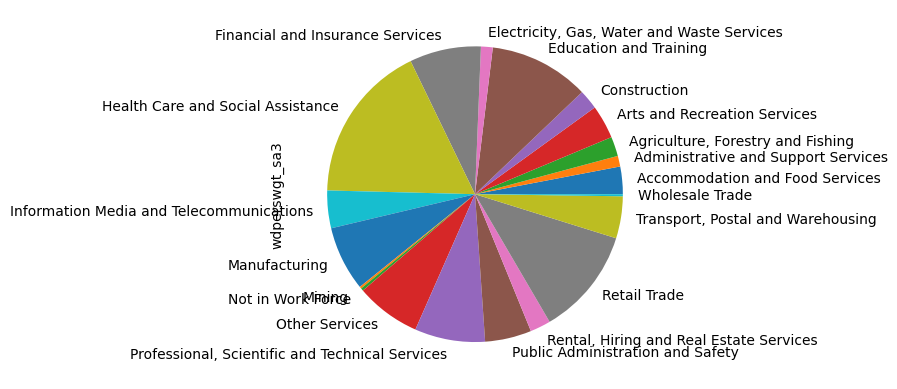

In [168]:
# b["anzsco1"].value_counts(normalize=True).plot(kind="bar")
(b.groupby("anzsic1")["wdperswgt_sa3"].sum() / b["wdperswgt_sa3"].sum()).plot(kind="pie")

<Axes: ylabel='wdperswgt_sa3'>

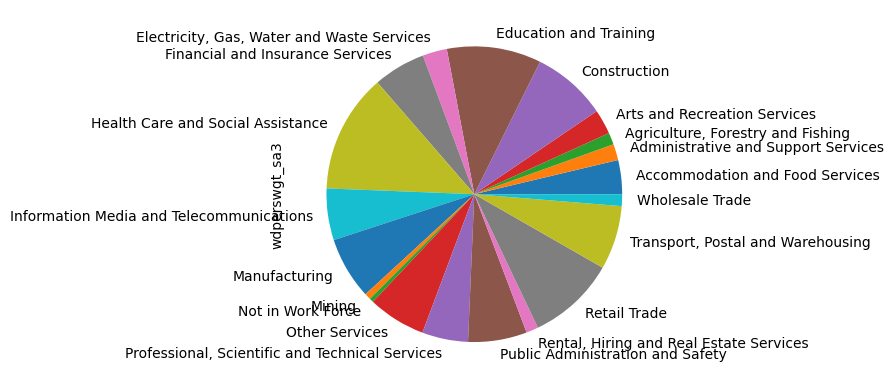

In [166]:
(c.groupby("anzsic1")["wdperswgt_sa3"].sum() / c["wdperswgt_sa3"].sum()).plot(kind="pie")

In [144]:
c.groupby("hhid")["sex"].apply(lambda x: list(x))

hhid
Y12H0000101    [M, F]
Y12H0000102    [F, M]
Y12H0000103    [M, F]
Y12H0000104    [F, M]
Y12H0000111    [M, F]
                ...  
Y20H4001008    [M, F]
Y20H4001009    [F, M]
Y20H4001017    [F, M]
Y20H4001024    [F, M]
Y20H4001029    [M, F]
Name: sex, Length: 14070, dtype: object

In [174]:
gay_hh = vista_hh[vista_hh["hhid"].isin(gay_hh_id)]
hetero_hh = vista_hh[vista_hh["hhid"].isin(hetero_hh_id)]

In [181]:
gay_hh.columns

Index(['hhid', 'surveyperiod', 'travdow', 'travmonth', 'daytype', 'dwelltype',
       'owndwell', 'hhsize', 'hhinc', 'visitors', 'aveage', 'youngest',
       'oldest', 'yearslived', 'monthslived', 'adultbikes', 'kidsbikes',
       'totalbikes', 'cars', 'fourwds', 'utes', 'vans', 'trucks', 'mbikes',
       'othervehs', 'totalvehs', 'wdhhwgt_sa3', 'wehhwgt_sa3', 'wdhhwgt_lga',
       'wehhwgt_lga', 'homesa1', 'homesa2', 'homesa2_name', 'homesa3',
       'homesa3_name', 'homesa4', 'homesa4_name', 'homelga',
       'homesubregion_asgc', 'homeregion_asgc', 'homesubregion_asgs',
       'homeregion_asgs', 'homepc'],
      dtype='object')

In [185]:
gay_hh.groupby("owndwell")["wdhhwgt_sa3"].sum() / gay_hh["wdhhwgt_sa3"].sum()

owndwell
Being Purchased    0.271744
Being Rented       0.340343
Fully Owned        0.387913
Name: wdhhwgt_sa3, dtype: float64

In [187]:
hetero_hh.groupby("owndwell")["wdhhwgt_sa3"].sum() / hetero_hh["wdhhwgt_sa3"].sum()

owndwell
Being Purchased       0.380609
Being Rented          0.209680
Fully Owned           0.399164
Occupied Rent-Free    0.007038
Something Else        0.003509
Name: wdhhwgt_sa3, dtype: float64